Image Classification Project using CNN

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # Built-in dataset containing 60,000 32x32 color images in 10 classes
from tensorflow.keras.models import Sequential # Model type where layers are stacked linearly
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # : Different layer types for the CNN
from tensorflow.keras.utils import to_categorical # Converts integer labels to one-hot encoded vectors
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load and Prepare the Data
print("Loading and preparing data...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Downloads CIFAR-10 dataset automatically
# x_train/x_test: Image data (50,000 training, 10,000 testing images)
# y_train/y_test: Labels (0-9 representing different classes)
# Images are 32x32 pixels with 3 color channels (RGB)

Loading and preparing data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Converts pixel values from integers (0-255) to floats (0-1)
# This helps the neural network train more efficiently

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Converts labels from single numbers (e.g., 3) to vectors (e.g., [0,0,0,1,0,0,0,0,0,0])
# Each position represents a class, with 1 indicating the correct class

In [6]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Human-readable names for the 10 CIFAR-10 categories

Layer breakdown:
First Convolutional Block:

Conv2D(32, (3, 3)): Creates 32 feature maps using 3x3 filters

Detects basic features like edges and corners
ReLU activation adds non-linearity
Input shape: 32x32x3 (height, width, channels)


MaxPooling2D((2, 2)): Reduces spatial dimensions by half

Takes maximum value in each 2x2 window
Reduces computation and helps prevent overfitting



Second Convolutional Block:

Conv2D(64, (3, 3)): Creates 64 feature maps

Learns more complex patterns from the first layer's output


MaxPooling2D((2, 2)): Further reduces dimensions

Classification Layers:

Flatten(): Converts 2D feature maps to 1D vector
Dense(64): Fully connected layer with 64 neurons

Learns relationships between features


Dense(10): Output layer with 10 neurons (one per class)

Softmax activation outputs probabilities that sum to 1

In [7]:
# Step 3: Build the CNN Model
print("Building the CNN model...")
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Dense layers for classification
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 output neurons for 10 classes
])

Building the CNN model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary() # Displays the model architecture and parameter counts

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 4: Compile and Train the Model
print("Compiling the model...")
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Optimizer='adam': Adaptive learning rate algorithm for updating weights
# Loss='categorical_crossentropy': Measures error for multi-class classification
# Metrics=['accuracy']: Tracks percentage of correct predictions


print("Training the model...")
# Training for 10 epochs
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)
# epochs=10: Trains through entire dataset 10 times
# batch_size=64: Processes 64 images at a time before updating weights
# validation_data: Tests on test set after each epoch
# history: Stores training metrics for analysis

Compiling the model...
Training the model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.3729 - loss: 1.7336 - val_accuracy: 0.5485 - val_loss: 1.2780
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 70ms/step - accuracy: 0.5807 - loss: 1.1923 - val_accuracy: 0.6075 - val_loss: 1.1191
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6338 - loss: 1.0487 - val_accuracy: 0.6480 - val_loss: 1.0208
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6661 - loss: 0.9557 - val_accuracy: 0.6563 - val_loss: 0.9935
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.6918 - loss: 0.8834 - val_accuracy: 0.6647 - val_loss: 0.9657
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.7126 - loss: 0.8320 - val_accuracy: 0.6793 - val_loss: 0.9258
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.7252 - loss: 0.7882 - val_accuracy: 0.6791 - val_loss: 0.9395
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 7

In [10]:
# Step 5: Evaluate the Model
print("Evaluating the model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')
# Evaluates final model on test set
# Returns loss value and accuracy percentage

Evaluating the model...
313/313 - 4s - 13ms/step - accuracy: 0.6980 - loss: 0.8951

Test accuracy: 0.6980


In [11]:
# Bonus: Make a prediction on a single image
print("\nMaking a prediction...")
# Get a single image from the test set
img = x_test[0]
# Add a batch dimension because the model expects it
img_array = np.expand_dims(img, axis=0)
img_array.shape

# Takes first test image
# expand_dims: Adds batch dimension (model expects shape [batch_size, 32, 32, 3])


Making a prediction...


(1, 32, 32, 3)

In [12]:
# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
true_class = np.argmax(y_test[0])
# predictions: Array of 10 probabilities
# argmax: Finds index of highest probability (predicted class)
# Compares with true class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [13]:
print(f"Predicted class: {class_names[predicted_class]}")
print(f"True class: {class_names[true_class]}")


Predicted class: cat
True class: cat


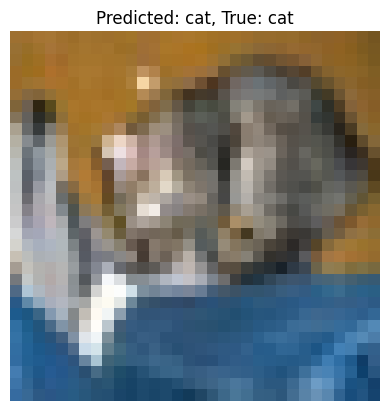

In [14]:
# Display the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")
plt.axis('off')
plt.show()
# Displays the image with predicted and true labels
# Helps visually verify if the prediction makes sense

In [15]:
# Bonus: Make a prediction on a single image
print("\nMaking a prediction...")
# Get a single image from the test set
img = x_test[800]
# Add a batch dimension because the model expects it
img_array = np.expand_dims(img, axis=0)
img_array.shape

# Takes first test image
# expand_dims: Adds batch dimension (model expects shape [batch_size, 32, 32, 3])


Making a prediction...


(1, 32, 32, 3)

In [16]:
# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
true_class = np.argmax(y_test[800])
# predictions: Array of 10 probabilities
# argmax: Finds index of highest probability (predicted class)
# Compares with true class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [17]:
print(f"Predicted class: {class_names[predicted_class]}")
print(f"True class: {class_names[true_class]}")

Predicted class: horse
True class: horse


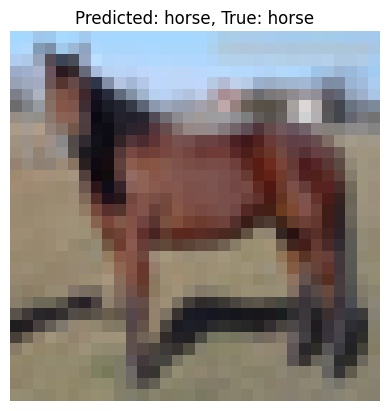

In [18]:
# Display the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")
plt.axis('off')
plt.show()
# Displays the image with predicted and true labels
# Helps visually verify if the prediction makes sense

In [19]:
# Bonus: Make a prediction on a single image
print("\nMaking a prediction...")
# Get a single image from the test set
img = x_test[600]
# Add a batch dimension because the model expects it
img_array = np.expand_dims(img, axis=0)
img_array.shape

# Takes first test image
# expand_dims: Adds batch dimension (model expects shape [batch_size, 32, 32, 3])


Making a prediction...


(1, 32, 32, 3)

In [19]:
# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
true_class = np.argmax(y_test[800])
# predictions: Array of 10 probabilities
# argmax: Finds index of highest probability (predicted class)
# Compares with true class

In [20]:
print(f"Predicted class: {class_names[predicted_class]}")
print(f"True class: {class_names[true_class]}")

Predicted class: horse
True class: horse


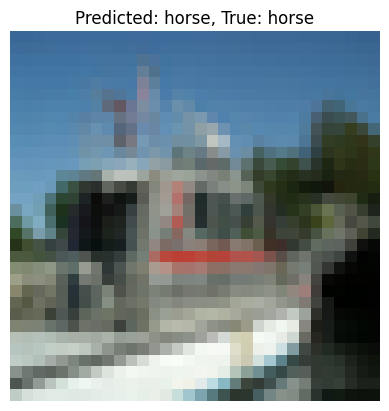

In [21]:
# Display the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")
plt.axis('off')
plt.show()
# Displays the image with predicted and true labels
# Helps visually verify if the prediction makes sense